训练集标注可视化

In [123]:
%config InlineBackend.figure_format = 'retina'

In [124]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from glob import glob
import json
import numpy as np
from pathlib import Path
from tqdm import tqdm



# 按行生成彩色标注框
idx2color = []
for i in range(3):
    for j in range(3):
        for k in range(3):
            idx2color.append((i*100, j*100, k*100))
idx2color.append((255, 0, 0))
idx2color = np.array(idx2color)


def table_visualize(img_name, src_img, table, key='row', only_last=False):
    last_img = src_img.copy()
    for idx, row in enumerate(table[key]):
        color = idx2color[idx % len(idx2color)]
        pts = np.array(row, dtype=np.int32)
        if not only_last:
            temp_img = src_img.copy()
            cv2.polylines(temp_img, [pts], True, color.tolist(), 1)
        cv2.polylines(last_img, [pts], True, color.tolist(), 1)
        
        cx, cy = pts.mean(axis=0)
        if not only_last:
            cv2.putText(temp_img, str(idx), (int(cx), int(cy)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color.tolist(), 2)
            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
            plt.title(f"{img_name}: {key}")
            plt.imshow(temp_img)
            plt.show()
        cv2.putText(last_img, str(idx), (int(cx), int(cy)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color.tolist(), 2)
        last_img = cv2.cvtColor(last_img, cv2.COLOR_BGR2RGB)
    plt.title(f"{img_name}: {key}")
    plt.imshow(last_img)
    plt.show()

def label_visualize(img_name, src_img, label):
    for cell in label['cells']:
        start_row_idx = cell['row_start_idx']
        end_row_idx   = cell['row_end_idx']
        start_col_idx = cell['col_start_idx']
        end_col_idx   = cell['col_end_idx']
        color = idx2color[start_row_idx % len(idx2color)]
        x0, y0, x1, y1 = cell['bbox']

        pts = np.array(cell['segmentation'], dtype=np.int32)
        cv2.rectangle(src_img, (int(x0), int(y0)), (int(x1), int(y1)), color.tolist(), 1)

        theight = cv2.getTextSize(str(start_row_idx), cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0][1]
        show_text = f"{start_row_idx}" if start_row_idx == end_row_idx else f"{start_row_idx}-{end_row_idx}"
        show_text += f",{start_col_idx}" if start_col_idx == end_col_idx else f" {start_col_idx}-{end_col_idx}"

        cv2.putText(src_img, show_text, (int(x0), int(y0)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color.tolist(), 1)
        # transcript = cell['transcript']
        # cv2.putText(src_img, transcript, (int(x0), int(y0)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color.tolist(), 1)
        plt.title(img_name)
        plt.imshow(src_img)
    plt.show()

def rotate_label_visualize(img_name, src_img, label):
    h, w = src_img.shape[:2]
    center = (w//2, h//2)
    M = cv2.getRotationMatrix2D(center, -1, 1.0)
    src_img = cv2.warpAffine(src_img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    # src_img = cv2.warpAffine(src_img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

    for cell in label['cells']:
        start_row_idx = cell['row_start_idx']
        end_row_idx   = cell['row_end_idx']
        start_col_idx = cell['col_start_idx']
        end_col_idx   = cell['col_end_idx']
        color = idx2color[start_row_idx % len(idx2color)]
        x0, y0, x1, y1 = cell['bbox']
        print(1, type(cv2.transform(np.array([[[x0, y0], [x1, y1]]]), M)))
        print(2, type(cv2.transform(np.array([[[x0, y0], [x1, y1]]]), M).squeeze()))
        [x0, y0], [x1, y1] = cv2.transform(np.array([[[x0, y0], [x1, y1]]]), M).squeeze().astype(np.int32)

        pts = np.array(cell['segmentation'], dtype=np.int32)
        cv2.rectangle(src_img, (int(x0), int(y0)), (int(x1), int(y1)), color.tolist(), 1)

        theight = cv2.getTextSize(str(start_row_idx), cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0][1]
        show_text = f"{start_row_idx}" if start_row_idx == end_row_idx else f"{start_row_idx}-{end_row_idx}"
        show_text += f",{start_col_idx}" if start_col_idx == end_col_idx else f" {start_col_idx}-{end_col_idx}"

        cv2.putText(src_img, show_text, (int(x0), int(y0)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color.tolist(), 1)
        plt.title(img_name)
        plt.imshow(src_img)
    plt.show()





[[ 61  61  61]
 [ 62  62  62]
 [ 63  63  63]
 ...
 [255 255 252]
 [255 255 254]
 [255 255 255]]
[    3     1     2 ...     5   513 13944]
13944
[255 255 255]


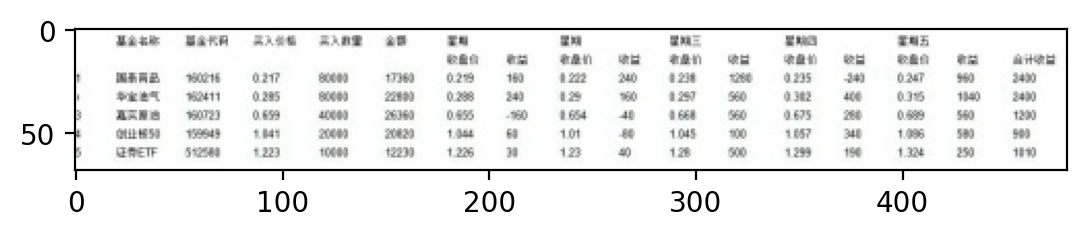

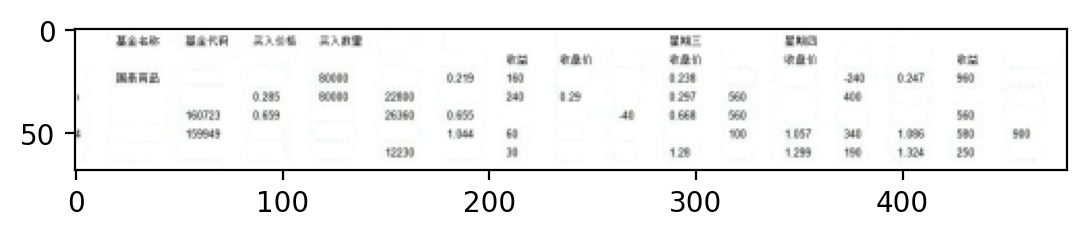

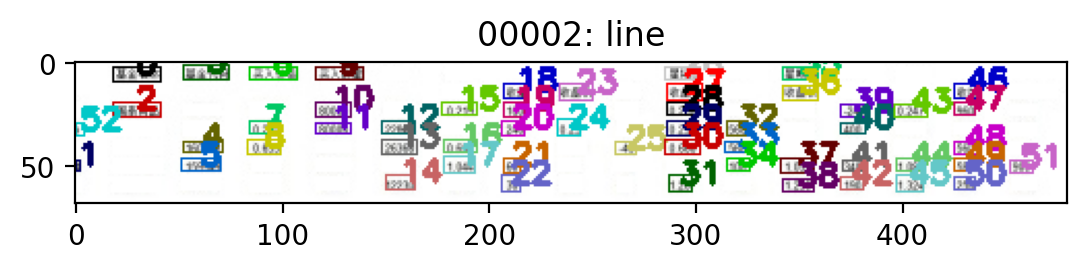

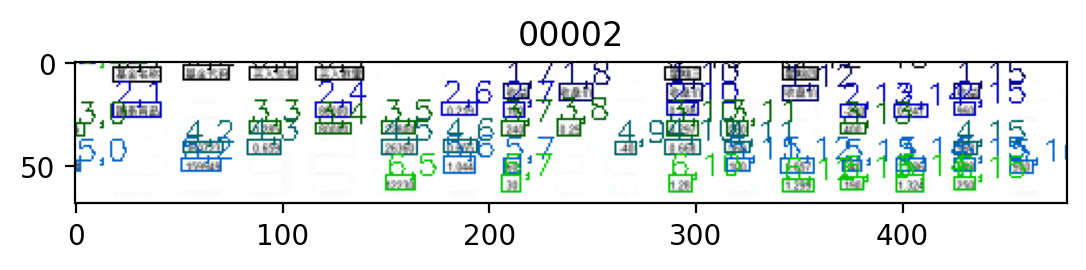

In [125]:
import utils.table2label as table2label
import random
'''
可视化单一图像
'''
img_id = '00849'
img_id = '00838'
img_id = '00741'
img_id = '02078'
img_id = '00075'
img_id = '00169'
img_id = '00425'
img_id = '00761'
img_id = '00856'
img_id = '00001'
img_id = '00009'
img_id = '00023'
img_id = '00027'
img_id = '00029'
img_id = '00033'
img_id = '00034'
img_id = '08532' # table error
img_id = '10552' # table error
img_id = '00021' # ok | line 40 not find
img_id = '00057' # ok | line 34 not find
img_id = '00084' # ok | line 20,61,62,103,104 not find
img_id = '00169' # ok | line 0,2,9,10,16,17 not find
img_id = '00250' # ok | line 6 not find
img_id = '00273' # 单行标注，但列标注分为多行
img_id = '00301' # 单行标注，但列标注分为多行
img_id = '00303' # 单行标注，但列标注分为多行
img_id = '00307' # 单行标注，但列标注分为多行
img_id = '02572' # 单行标注，但列标注分为多行
img_id = '06615' # 
img_id = '02078' # ok
img_id = '12094' # ok | line 10 not find
img_id = '12077' # 格子太多了
img_id = '12058' # ok | 单行标注按line划分的，非法
img_id = '12035' # ok | 单行标注按line划分的，非法
img_id = '04503' # ok | 单行标注按line划分的，非法
img_id = '00280' # 行标注坐标遗漏line
img_id = '08532' # 行标注坐标遗漏line
img_id = '00856' # 行标注坐标遗漏line
img_id = '03161' # 行标注坐标遗漏line
img_id = '05058' # 行标注坐标遗漏line
img_id = '06584' # line15 标注问题
img_id = '06616' #
img_id = '07156' #
img_id = '07087' #
img_id = '12058'
img_id = '00002'


# img_id = '12053' # ok
# img_id = '12058' # row cell label multiple
# img_id = '12094' # cell label lost
jpg_path  = f"/media/ubuntu/Date12/TableStruct/new_data/train_jpg480max/{img_id}.jpg"
json_path = f"/media/ubuntu/Date12/TableStruct/new_data/train_jpg480max/{img_id}.json"

img_array = cv2.imread(jpg_path)
table = json.load(open(json_path, 'r'))
table['is_wireless'] = True

unique_values, value_counts = np.unique(img_array.reshape(-1, img_array.shape[-1]), axis=0, return_counts=True)
print(unique_values)
print(value_counts)

print(value_counts[np.argmax(value_counts)])
print(unique_values[np.argmax(value_counts)])

common_value = unique_values[np.argmax(value_counts)]

plt.imshow(img_array)
plt.show()

# for line_seg in table['line']:
    # bbox = table2label.segmentation_to_bbox([line_seg])
    # x0, y0, x1, y1 = bbox
    # img_array[int(y0):int(y1), int(x0):int(x1)] = common_value
    # cv2.fillPoly(img_array, np.array([line_seg], dtype=np.int32), color=common_value.tolist())
# table_visualize(img_id, img_array, table, 'cell', only_last=True)

for i in range(len(table['line'])//2):
    idx = random.randint(0, len(table['line'])-1)
    line_seg = table['line'][idx]
    cv2.fillPoly(img_array, np.array([line_seg], dtype=np.int32), color=common_value.tolist())
    table['line'].remove(table['line'][idx])

plt.imshow(img_array)
plt.show()


# print(np.unique(src_img, return_counts=True))
# print(np.argmax(np.unique(src_img, return_counts=True)[1]))

# mode = np.unique(src_img, return_counts=True)[0][np.argmax(np.unique(src_img, return_counts=True)[1])]

# if not table2label.table_valid(table):
#     print("table_valid error!", img_id)
# # table = table2label.fix_table_error(table)

#table_visualize(img_id, src_img, table, 'row', only_last=False)
#table_visualize(img_id, src_img, table, 'col', only_last=False)
table_visualize(img_id, img_array, table, 'line', only_last=True)
#table_visualize(img_id, src_img, table, 'cell', only_last=True)
#layout = table2label.table2layout(table)
label = table2label.table2label(table)
label_visualize(img_id, img_array, label)
#print(np.array(label['layout']))
#
valid, msg = table2label.judge_error(table, label)

